# F1 Win Prediction Project
#### Alex Boardman - BrainStation

## Table of Contents

1. [**Introduction**](#1)
    - Project Description
    - Data Description
2. [**Acquiring and Loading Data**](#2)
	- Importing Libraries and Notebook Setup
    - Loading Data
    - Basic Data Exploration
    - Areas to Fix
3. [**Data Proprocessing**](#3)
4. [**Data Analysis**](#4)
5. [**Conclusion**](#5)
    - Insights
    - Suggestions
    - Possible Next Steps
6. [**Epilogue**](#6) 
    - References
    - Versioning

---

# 1

### Introduction

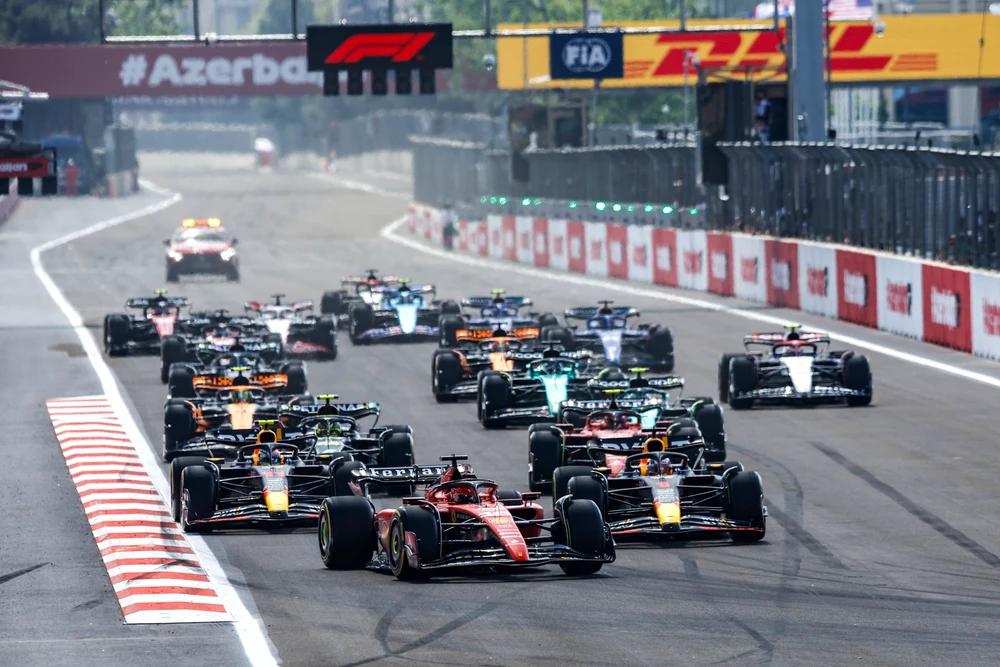## 

### Project Description

**Goal/Purpose:** 

This executive overview outlines a project focused on leveraging data science & machine learning to predict Formula 1 race outcomes, targeting the intricate blend of sports analytics and data science. By analysing large datasets including historical race data, weather conditions, and team dynamics, the initiative aims to refine prediction accuracy and address the challenges of incomplete data and the unpredictable nature of racing. The project serves Formula 1 teams, sports analysts, the $235 billion global sports betting market, and fans by offering enhanced predictive insights for race strategy optimization, betting odds formulation, and fan engagement. Utilizing data sources from F1, OpenF1 and Ergast F1, the project aims to integrate performance metrics, team and driver information, and contextual race details, to offer a comprehensive approach to predicting and understanding Formula 1 race outcomes.
<p>&nbsp;</p>

### **Questions to be Answered:**

- **Can Machine Learning Improve Race Outcome Predictions?**

How can machine learning models utilize extensive datasets, including historical race data, driver and constructor standings, weather conditions, and qualifying times, to predict Formula 1 race outcomes more accurately than traditional methods?
- **What Factors Most Influence Race Outcomes?**

Among the myriad of factors such as team strategies, driver performance, car development, weather conditions, and circuit characteristics, which have the most significant impact on predicting the outcomes of races?


<p>&nbsp;</p>

### **Assumptions/Methodology/Scope:** 

Briefly describe assumptions, processing steps, and the scope of this project.

<p>&nbsp;</p>

### Data Description

**Content:** 

This dataset is a _(filetype) file of _(how many) data points which contains ___. 

<p>&nbsp;</p>

**Description of Attributes:** 

Here you can describe what each column represents.

| Column  | Description |
| :------ | :---------- |
| column1 | description1 |

<p>&nbsp;</p>

**Acknowledgements:** 

This dataset is provided by _(. The original dataset was scraped by _) and the original source can be found on [website](https://website.link).

---

# 2

## Acquiring and Loading Data
### Importing Libraries and Notebook Setup

In [3]:
# Install libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

In [8]:
# Data manipulation
import datetime
import numpy as np
import pandas as pd
import pandas.api.types as ptypes
from skimpy import skim, clean_columns

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pandas settings
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 60
pd.options.display.float_format = '{:,.3f}'.format

# Visualization settings
from matplotlib import rcParams
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = (16, 5)   
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['font.size'] = 12
# rcParams['figure.dpi'] = 300
rcParams['savefig.dpi'] = 300
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
custom_palette = ['#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54', '#ffa600']
custom_hue = ['#004c6d', '#346888', '#5886a5', '#7aa6c2', '#9dc6e0', '#c1e7ff']
custom_divergent = ['#00876c', '#6aaa96', '#aecdc2', '#f1f1f1', '#f0b8b8', '#e67f83', '#d43d51']
sns.set_palette(custom_palette)
%config InlineBackend.figure_format = 'retina'

ModuleNotFoundError: No module named 'skimpy'

### Loading Data

**Circuits**

In [24]:
# # Load DataFrame
# file = 'file.csv'
# df = pd.read_csv(file)
circuits_df = pd.read_csv('C:/Users/Alex/F1_Capstone/Data/circuits.csv')

In [25]:
circuits_df.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [26]:
circuits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     object 
 8   url         77 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB


The circuits_df dataframe contains information on Formula 1 circuits. 

There are 77 entries, and each one lists the details of a circuit, including its unique identifier, reference code, name, location, country, geographical coordinates (latitude and longitude), altitude, and a URL to its Wikipedia page. 

This dataset is crucial for exploring the influence of circuit-specific characteristics, like geographical location and track layout, on race outcomes.

**Constructor Results**

In [28]:
# # Load DataFrame
# file = 'file.csv'
# df = pd.read_csv(file)
constructor_results_df = pd.read_csv('C:/Users/Alex/F1_Capstone/Data/constructor_results.csv')

In [29]:
constructor_results_df.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [30]:
constructor_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12290 entries, 0 to 12289
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  12290 non-null  int64  
 1   raceId                12290 non-null  int64  
 2   constructorId         12290 non-null  int64  
 3   points                12290 non-null  float64
 4   status                12290 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 480.2+ KB


The constructor_results_df dataframe records the results of Formula 1 constructors (teams) in races. 

The dataframe has 12,290 entries and includes information such as the unique ID for the constructor results, the race ID, the constructor ID, the points awarded, and the status of the result. 

The 'points' field indicates the number of points a constructor team earned in a particular race, and the 'status' field could potentially describe the status of the constructor's entry in that race, although it seems to have missing or placeholder values. 

This dataset is valuable for analyzing the performance of F1 teams across races and seasons.

**Constructor Standings**

In [31]:
# # Load DataFrame
# file = 'file.csv'
# df = pd.read_csv(file)
constructor_standings_df = pd.read_csv('C:/Users/Alex/F1_Capstone/Data/constructor_standings.csv')

In [32]:
constructor_standings_df.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [33]:
constructor_standings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13051 entries, 0 to 13050
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  13051 non-null  int64  
 1   raceId                  13051 non-null  int64  
 2   constructorId           13051 non-null  int64  
 3   points                  13051 non-null  float64
 4   position                13051 non-null  int64  
 5   positionText            13051 non-null  object 
 6   wins                    13051 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 713.9+ KB


The constructor_standings_df offers insights into Formula 1 team performance across various races. This DataFrame, encompassing 13,051 entries, provides details like constructor points, rank, wins, and race information. 

Analyzing this data allows for tracking team performance and standings throughout a season, potentially predicting future success based on accumulated points and wins. 

This information is valuable for assessing team competitiveness and their potential in upcoming races and championships.

**Constructors**

In [34]:
# # Load DataFrame
# file = 'file.csv'
# df = pd.read_csv(file)
constructors_df = pd.read_csv('C:/Users/Alex/F1_Capstone/Data/constructors.csv')

In [35]:
constructors_df.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [36]:
constructors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


The constructors_df provides a comprehensive history of Formula 1 teams, with 211 entries covering various constructors. Key information includes unique team identifiers, reference names, official team names, nationalities, and links to their Wikipedia pages. 

This data is valuable for understanding team history, origins, and their connection to other race-related data. The unique IDs serve as a key to link this data with other datasets for performance analysis, while team nationalities could be explored for potential correlations with success in the sport. 

Additionally, the provided URLs offer access to further information about each team.

**Driver Standings**

In [37]:
# # Load DataFrame
# file = 'file.csv'
# df = pd.read_csv(file)
driver_standings_df = pd.read_csv('C:/Users/Alex/F1_Capstone/Data/driver_standings.csv')

In [38]:
driver_standings_df.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [39]:
driver_standings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34124 entries, 0 to 34123
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  34124 non-null  int64  
 1   raceId             34124 non-null  int64  
 2   driverId           34124 non-null  int64  
 3   points             34124 non-null  float64
 4   position           34124 non-null  int64  
 5   positionText       34124 non-null  object 
 6   wins               34124 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


The driver_standings_df DataFrame, containing 34,124 entries, holds information about Formula 1 driver standings across races. 

Each row represents a driver's standing in a specific race, with details like points, position (numerical and textual), race ID, driver ID, and the number of wins. 

This data allows for analyzing individual driver performance and their position changes throughout the season.

**Drivers**

In [19]:
# # Load DataFrame
# file = 'file.csv'
# df = pd.read_csv(file)
drivers_df = pd.read_csv('C:/Users/Alex/F1_Capstone/Data/drivers.csv')

In [20]:
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [27]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


The drivers_df DataFrame stores information about Formula 1 drivers. Each row represents a driver, with details like unique ID, racing number, name, nationality, and a link to their Wikipedia page. 

This data can be used for various purposes, such as identifying drivers, tracking their careers, or analyzing performance based on factors like nationality (potential home advantage) or age (potential experience or performance correlation).

**Lap Times**

In [40]:
# # Load DataFrame
# file = 'file.csv'
# df = pd.read_csv(file)
lap_times_df = pd.read_csv('C:/Users/Alex/F1_Capstone/Data/lap_times.csv')

In [41]:
lap_times_df.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [42]:
lap_times_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551742 entries, 0 to 551741
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        551742 non-null  int64 
 1   driverId      551742 non-null  int64 
 2   lap           551742 non-null  int64 
 3   position      551742 non-null  int64 
 4   time          551742 non-null  object
 5   milliseconds  551742 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 25.3+ MB


The lap_times_df DataFrame holds Formula 1 lap times for individual drivers across races. Each row represents a lap, with information like race ID, driver ID, lap number, position during that lap, and the lap time in both seconds and milliseconds. 

This dataset, containing over 550,000 entries, can be used to analyze lap performance, compare lap times between drivers and races, and potentially identify factors influencing lap times.

**Pit Stops**

In [43]:
# # Load DataFrame
# file = 'file.csv'
# df = pd.read_csv(file)
pit_stops_df = pd.read_csv('C:/Users/Alex/F1_Capstone/Data/pit_stops.csv')

In [44]:
pit_stops_df.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [45]:
pit_stops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10089 entries, 0 to 10088
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        10089 non-null  int64 
 1   driverId      10089 non-null  int64 
 2   stop          10089 non-null  int64 
 3   lap           10089 non-null  int64 
 4   time          10089 non-null  object
 5   duration      10089 non-null  object
 6   milliseconds  10089 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 551.9+ KB


The pit_stops_df likely stores Formula 1 pit stop information for individual drivers across races. Each row represents a single pit stop, providing details like race ID, driver ID, lap number when the stop occurred, and the duration in both seconds and milliseconds. 

This data, containing over 10,000 entries, can be valuable for analyzing pit stop strategies, comparing durations and identifying areas for improvement, and understanding the impact of pit stops on overall race performance.

**Qualifying**

Getting the qualifying time data was the trickiest part, mainly because the Ergast data repository has some holes in the data and because qualifying rules changed so much over the years. Since 2006, qualifying takes place on a Saturday afternoon in a three-stage “knockout” system where the cars try to set their fastest lap time. In the past, qualifying would only consist of one or two sessions, causing missing data in my dataframe. I decided to consider only the best qualifying time for each driver, regardless of how many qualifying sessions were held in that year. The best qualifying time is reflected in the grid position, so I will later calculate the cumulative difference in times between the first qualified car and the others, hoping that it might give me an indication of how much faster a car is compared to the other ones.

In [46]:
# # Load DataFrame
# file = 'file.csv'
# df = pd.read_csv(file)
qualifying_df = pd.read_csv('C:/Users/Alex/F1_Capstone/Data/qualifying.csv')

In [47]:
qualifying_df.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [48]:
qualifying_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9815 non-null   int64 
 1   raceId         9815 non-null   int64 
 2   driverId       9815 non-null   int64 
 3   constructorId  9815 non-null   int64 
 4   number         9815 non-null   int64 
 5   position       9815 non-null   int64 
 6   q1             9807 non-null   object
 7   q2             9651 non-null   object
 8   q3             9488 non-null   object
dtypes: int64(6), object(3)
memory usage: 690.2+ KB


The qualifying_df contains 9,815 records of Formula 1 qualifying results, offering insights into driver and team performance across various races. 

It includes details like driver and team IDs, qualifying positions, and lap times from each session segment (q1, q2, q3). While the lap times are currently stored as text, converting them to a numerical format (e.g., seconds) would be useful for analysis. 

This data is essential for studying qualifying performance, a crucial factor influencing race outcomes. By analyzing qualifying positions and comparing times across sessions, you can gain insights into driver consistency, team strategies, and the potential correlation between qualifying and final race results.

#### Races

In [65]:
# # Load DataFrame
# file = 'file.csv'
# df = pd.read_csv(file)
races_df = pd.read_csv('C:/Users/Alex/F1_Capstone/Data/races.csv')

In [66]:
races_df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [67]:
races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1101 non-null   int64 
 1   year         1101 non-null   int64 
 2   round        1101 non-null   int64 
 3   circuitId    1101 non-null   int64 
 4   name         1101 non-null   object
 5   date         1101 non-null   object
 6   time         1101 non-null   object
 7   url          1101 non-null   object
 8   fp1_date     1101 non-null   object
 9   fp1_time     1101 non-null   object
 10  fp2_date     1101 non-null   object
 11  fp2_time     1101 non-null   object
 12  fp3_date     1101 non-null   object
 13  fp3_time     1101 non-null   object
 14  quali_date   1101 non-null   object
 15  quali_time   1101 non-null   object
 16  sprint_date  1101 non-null   object
 17  sprint_time  1101 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.0+ KB


The races_df (1,101 entries, 18 columns) offers details about Formula 1 races, including:

Unique race IDs, years, rounds, and circuit IDs.
Grand Prix names, dates, and times.
Links to relevant Wikipedia pages for each race.
Dates and times for practice sessions, qualifying, and potential sprint races (some with missing data).

This data is valuable for analyzing race schedules, historical trends, and exploring further details via the provided links.

**Results**

In [61]:
# # Load DataFrame
# file = 'file.csv'
# df = pd.read_csv(file)
results_df = pd.read_csv('C:/Users/Alex/F1_Capstone/Data/results.csv')

In [62]:
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [63]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time             26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

The results_df DataFrame holds Formula 1 race results (26,080 entries, 18 columns). 

Information includes driver IDs, teams, finishing positions, lap times, and fastest laps. 

This data allows for analyzing individual driver performance, constructor performance, and race strategies. The provided glimpse showcases entries from a single race (same raceId), with unique IDs (resultId) distinguishing each driver's performance details.

**Seasons**

In [52]:
# # Load DataFrame
# file = 'file.csv'
# df = pd.read_csv(file)
seasons_df = pd.read_csv('C:/Users/Alex/F1_Capstone/Data/seasons.csv')

In [53]:
seasons_df.head()

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...


In [54]:
seasons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    74 non-null     int64 
 1   url     74 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


The seasons_df stores information about Formula One seasons (74 entries, 2 columns). 

It contains the year (integer) and a link (URL) to the season's Wikipedia page. 

This data allows for tracking information across seasons or exploring specific seasons in detail by following the provided links.

**Sprint Results**

In [55]:
# # Load DataFrame
# file = 'file.csv'
# df = pd.read_csv(file)
sprint_results_df = pd.read_csv('C:/Users/Alex/F1_Capstone/Data/sprint_results.csv')

In [56]:
sprint_results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


In [57]:
sprint_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   resultId        180 non-null    int64 
 1   raceId          180 non-null    int64 
 2   driverId        180 non-null    int64 
 3   constructorId   180 non-null    int64 
 4   number          180 non-null    int64 
 5   grid            180 non-null    int64 
 6   position        180 non-null    object
 7   positionText    180 non-null    object
 8   positionOrder   180 non-null    int64 
 9   points          180 non-null    int64 
 10  laps            180 non-null    int64 
 11  time            180 non-null    object
 12  milliseconds    180 non-null    object
 13  fastestLap      180 non-null    object
 14  fastestLapTime  180 non-null    object
 15  statusId        180 non-null    int64 
dtypes: int64(10), object(6)
memory usage: 22.6+ KB


The sprint_results_df is considerably smaller (180 entries) compared to a previous dataset, likely containing sprint race results. 

While sharing similar columns with the main "results" DataFrame, it suggests data from a different event format. The data includes details like driver IDs, positions (numerical and text), laps, times, and fastest laps. 

Analysing the provided glimpse reveals entries from a single race, where all drivers finished (17 laps), points were awarded to top positions, and the fastest lap times were competitive (1:29.937).

**Status**

In [58]:
# # Load DataFrame
# file = 'file.csv'
# df = pd.read_csv(file)
status_df = pd.read_csv('C:/Users/Alex/F1_Capstone/Data/status.csv')

In [59]:
status_df.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [60]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  139 non-null    int64 
 1   status    139 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


The status_df provides a reference for interpreting driver statuses in Formula 1 races. 

This small DataFrame (139 entries) defines each unique status code (e.g., finished, retired) with a corresponding textual description (e.g., "Finished the Race"). 

This information enriches race data by explaining why drivers might not finish a race or the nature of incidents they faced. This allows for deeper analysis, like understanding car reliability issues, driver errors, or the impact of race conditions, ultimately enhancing readability and providing valuable insights for data analysis and visualizations.

### F1 Data for Grand Prix Winner Prediction:DataFrames Summary

This analysis explores various Formula 1 (F1) dataframes and their potential in predicting Grand Prix winners. Each dataframe offers unique insights:

- **Circuits, constructors, and drivers**: These dataframes (circuits_df, constructor_, driver_) provide details on tracks, team performance, and driver profiles, including historical information and potentially influential factors like nationality (drivers_df).

- **Performance data**: Dataframes like lap_times_df and pit_stops_df offer crucial insights into race pace, strategy, and consistency.

- **Qualifying and race results**: Qualifying_df and results_df (including races_df and sprint_results_df) capture qualifying performance and race outcomes, essential for understanding race dynamics and factors influencing wins.

- **Seasonal context**: Seasons_df and status_df provide context for performance across seasons and race statuses (finished/DNF).

The key to accurate predictions lies in combining these data points:

**What would an ideal dataset include?**
An ideal dataset for prediction would integrate information from:

- Qualifying: Grid position as a crucial predictor.

- Standings: Driver and constructor momentum throughout the season.

- Performance data: Lap times, pit stops, and strategy.

- Circuit characteristics: Track-specific features impacting car performance.

- Driver and team profiles: Historical data, experience, and resource capabilities.
- Weather conditions: Potential impact on race day performance.

**How to analyse the dataset**

Machine learning models like Random Forests or Gradient Boosting Machines (GBMs) can leverage this comprehensive data to capture complex relationships between these factors and race outcomes.


**However, success hinges on:**

- Data quality: Ensuring clean and accurate data.
- Feature engineering: Transforming data to best represent the nuances of F1 racing.
- Model training and evaluation: Using cross-validation to avoid overfitting and testing on unseen data for generalizability.
- Advanced techniques: Employing ensemble learning and hyperparameter tuning for further accuracy refinement.

By effectively utilizing this data and model, we can gain valuable insights to:

- Inform team strategies.
- Enhance fan engagement.
- Potentially guide betting markets with more accurate predictions.

## Putting the information Together

In [12]:
race_predictor_df = pd.read_excel('C:/Users/Alex/OneDrive/BrainStation/Data_Science_Bootcamp/Capstone_Project/capstone-Aboard89/data/f1_data_capstone_v1.xlsx')

In [ ]:
Users\Alex\OneDrive\BrainStation\Data_Science_Bootcamp\Capstone_Project\capstone-Aboard89\data

### Basic Data Exploration

In [5]:
# # Show rows and columns count
print(f"Rows count: {race_predictor_df.shape[0]}\nColumns count: {race_predictor_df.shape[1]}")

Rows count: 11235
Columns count: 37


In [6]:
race_predictor_df.head()

,Index,resultId,raceId,year,race,country,nationality_of_circuit,driverId,number,driver_name,...,fastestLap_ms,fastest_lap_from_last_race,number_of_pit_stops,average_time_lost_in_pits,statusId,status,status_finished_last_race,major_regulation_change,team_rank_first_race_after_major_regulation_change,team_development_rank_last_year
0,240,7560,1,2009,Australian Grand Prix,australia,Australian,67,12,Sébastien Buemi,...,Not Found,NaN,0,0.00,1,Finished,NaN,0,NaN,NaN
1,240,7561,1,2009,Australian Grand Prix,australia,Australian,7,11,Sébastien Bourdais,...,Not Found,NaN,0,0.00,1,Finished,NaN,0,NaN,NaN
2,240,7568,1,2009,Australian Grand Prix,australia,Australian,8,4,Kimi Räikkönen,...,Not Found,NaN,0,0.00,24,Differential,NaN,0,NaN,NaN
3,240,7554,1,2009,Australian Grand Prix,australia,Australian,18,22,Jenson Button,...,88000,NaN,2,26.89,1,Finished,NaN,0,NaN,NaN
4,240,7555,1,2009,Australian Grand Prix,australia,Australian,22,23,Rubens Barrichello,...,89001,NaN,2,29.01,1,Finished,NaN,0,NaN,NaN


In [7]:
race_predictor_df.tail()

,Index,resultId,raceId,year,race,country,nationality_of_circuit,driverId,number,driver_name,...,fastestLap_ms,fastest_lap_from_last_race,number_of_pit_stops,average_time_lost_in_pits,statusId,status,status_finished_last_race,major_regulation_change,team_rank_first_race_after_major_regulation_change,team_development_rank_last_year
11230,527,26080,1110,2023,Belgian Grand Prix,belgium,Belgian,825,20,Kevin Magnussen,...,111000,NaN,2,23.61,1,Finished,NaN,0,NaN,NaN
11231,527,26081,1110,2023,Belgian Grand Prix,belgium,Belgian,817,3,Daniel Ricciardo,...,111000,NaN,2,23.07,1,Finished,NaN,0,NaN,NaN
11232,527,26082,1110,2023,Belgian Grand Prix,belgium,Belgian,858,2,Logan Sargeant,...,110005,NaN,3,23.54,1,Finished,NaN,0,NaN,NaN
11233,527,26084,1110,2023,Belgian Grand Prix,belgium,Belgian,832,55,Carlos Sainz,...,113001,NaN,1,23.30,130,Collision damage,NaN,0,NaN,NaN
11234,527,26085,1110,2023,Belgian Grand Prix,belgium,Belgian,857,81,Oscar Piastri,...,Not Found,NaN,0,0.00,130,Collision damage,NaN,0,NaN,NaN


The `race_predictor_df.head()` and `race_predictor_df.tail()` tables present the top and bottom entries of a dataset concerning Formula 1 race outcomes. 

- The dataset appears to span from 2009 to 2023 and includes various features such as race ID, year, race name, driver information, and performance metrics like fastest laps and pit stops. 
- Notably, there are missing values (represented as `NaN`) in several columns, including **'fastest lap from last race'**, **'team rank first race after major regulation change'**, and **'team development rank last year'**. This indicates that the dataset has incomplete records in these areas. 
- The data also contains results-related information, such as the race outcome ('Finished', 'Differential', 'Collision damage'), and details about regulation changes, which may be helpful for predicting future race results. 
- The presence of 'Not Found' entries for the **'fastestLap_ms'** field suggests missing or unrecorded lap times. 

Overall, the dataset provides a comprehensive historical account of Formula 1 races that could be used to forecast race outcomes using machine learning models.

#### Check Data Types

In [8]:
# # Show data types
race_predictor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11235 entries, 0 to 11234
Data columns (total 37 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Index                                               11235 non-null  int64  
 1   resultId                                            11235 non-null  int64  
 2   raceId                                              11235 non-null  int64  
 3   year                                                11235 non-null  int64  
 4   race                                                11235 non-null  object 
 5   country                                             11235 non-null  object 
 6   nationality_of_circuit                              11235 non-null  object 
 7   driverId                                            11235 non-null  int64  
 8   number                                              11235 non-null  int64  


There are a total of 37 columns.
- **Integer columns (int64)** are 15 in total.They seem to have a complete set of 11235 non-null values, indicating no missing values and likely a full set of records.
- **Float columns (float64)** are 8 in total. The columns also seem to have no missing values but watch out for zeroes that might represent missing or placeholder values.
- **Object columns (string or mixed types)** are 14 in total. These include categorical variables and text strings. The column Former_F1_World_Champion notably has many missing values (only 2537 non-null out of 11235), which suggests that not all drivers in the dataset become world champions.

The dataset has 11235 entries, suggesting that for most columns, data is complete. However, some columns, like Former_F1_World_Champion, have missing values, indicated by a non-null count lower than the total entry count.
The memory usage is 3.4+ MB.

#### Check Missing Data

In [11]:
# # Print percentage of missing values

missing_percent = race_predictor_df.isna().mean().sort_values(ascending=False)
print('---- Percentage of Missing Values (%) -----')
if missing_percent.sum():
    print(missing_percent[missing_percent > 0] * 100)
else:
    print('None')

---- Percentage of Missing Values (%) -----
team_development_rank_last_year                       100.000000
status_finished_last_race                             100.000000
points_in_previous_race                               100.000000
laps_completed_in_previous_races                      100.000000
fastest_lap_from_last_race                            100.000000
team_rank_first_race_after_major_regulation_change    100.000000
Former_F1_World_Champion                               77.418781
dtype: float64


The table displayed is a summary of missing data within your `race_predictor_df` DataFrame, showing the percentage of missing values for each column. 

- Several columns, such as 'team_development_rank_last_year', 'status_finished_last_race', 'points_in_previous_race', 'laps_completed_in_previous_races', 'fastest_lap_from_last_race', 'team_rank_first_race_after_major_regulation_change', and 'Former_F1_World_Champion' have a high percentage of missing values, with some up to 100%, indicating that they are completely missing data across all entries. 
- The 'Former_F1_World_Champion' column has missing data in approximately 77.41% of its entries. 

This information is crucial for data cleaning and preparation before any further analysis or machine learning, as it highlights the need for addressing these missing values either by imputation, deletion, or acquiring more complete data.

#### Check for Duplicate Rows

In [10]:
# # Show number of duplicated rows
print(f"No. of entirely duplicated rows: {race_predictor_df.duplicated().sum()}")

# # Show duplicated rows
race_predictor_df[race_predictor_df.duplicated()]

No. of entirely duplicated rows: 0


,Index,resultId,raceId,year,race,country,nationality_of_circuit,driverId,number,driver_name,...,fastestLap_ms,fastest_lap_from_last_race,number_of_pit_stops,average_time_lost_in_pits,statusId,status,status_finished_last_race,major_regulation_change,team_rank_first_race_after_major_regulation_change,team_development_rank_last_year


The code snippet you provided checks for duplicate rows in a pandas DataFrame named `race_predictor_df`. It performs two steps:

1. **Checks for the number of duplicates:** It uses the `.duplicated()` method to identify all rows that are entirely identical to another row in the DataFrame. The `.sum()` method then counts the number of these duplicates, and the output (`No. of entirely duplicated rows: 0`) indicates there are **no** rows that are completely identical in this DataFrame.

2. **Shows the duplicate rows:** Although there are no **entirely** duplicated rows, the second line attempts to display any rows that were marked as duplicates by the `.duplicated()` method. Since there are none, the output is an empty DataFrame, meaning there are no partially or entirely duplicate rows in `race_predictor_df`.


#### Check Uniqueness of Data

In [12]:
# # Print the percentage similarity of values (the lower %, the better)
num_unique = race_predictor_df.nunique().sort_values()
print('---- Percentage Similarity of Values (%) -----')
print(100/num_unique)

---- Percentage Similarity of Values (%) -----
team_development_rank_last_year                             inf
team_rank_first_race_after_major_regulation_change          inf
laps_completed_in_previous_races                            inf
fastest_lap_from_last_race                                  inf
points_in_previous_race                                     inf
status_finished_last_race                                   inf
home_race                                             50.000000
major_regulation_change                               50.000000
number_of_pit_stops                                   14.285714
Former_F1_World_Champion                              10.000000
constructor_nationality                                7.142857
engine_manufacturer                                    4.761905
F2_champion                                            4.347826
positionOrder                                          3.846154
starting_grid_position                                 3.

The chart illustrates the percentage similarity of values within each column of the `race_predictor_df` DataFrame, which assesses the uniqueness of the data by calculating the inverse of the proportion of unique entries. Columns with `inf` (infinity) suggest a division by zero, indicating that these columns may have all unique values or no data at all. Columns like 'home_race' and 'major_regulation_change' have high similarity percentages, indicating less uniqueness and a higher repetition of values. On the contrary, columns at the bottom of the list, such as 'raceId', 'Index', 'fastestLap_ms', and 'resultId', show very low percentages, reflecting a high level of uniqueness — these columns likely contain identifiers or time-based data with a wide range of values. This understanding of data uniqueness is essential for feature selection, as columns with high similarity might carry less discriminative information for predictive modeling, whereas highly unique columns might be identifiers or carry significant unique information per entry.

#### Check Data Range

In [14]:
# # Print summary statistics
race_predictor_df.describe(include='all')
# skim(race_predictor_df)

,Index,resultId,raceId,year,race,country,nationality_of_circuit,driverId,number,driver_name,...,fastestLap_ms,fastest_lap_from_last_race,number_of_pit_stops,average_time_lost_in_pits,statusId,status,status_finished_last_race,major_regulation_change,team_rank_first_race_after_major_regulation_change,team_development_rank_last_year
count,11235.000000,11235.000000,11235.000000,11235.000000,11235,11235,11235,11235.000000,11235.000000,11235,...,11235,0.0,11235.000000,11235.000000,11235.000000,11235,0.0,11235.000000,0.0,0.0
unique,NaN,NaN,NaN,NaN,43,35,32,NaN,NaN,153,...,605,NaN,NaN,NaN,NaN,109,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Spanish Grand Prix,great-britain,Italian,NaN,NaN,Fernando Alonso,...,Not Found,NaN,NaN,NaN,NaN,Finished,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,621,639,676,NaN,NaN,370,...,2125,NaN,NaN,NaN,NaN,4755,NaN,NaN,NaN,NaN
mean,259.636938,13313.263017,535.897107,2009.244148,NaN,NaN,NaN,279.776947,17.213974,NaN,...,NaN,NaN,1.491500,19.593478,9.583801,NaN,NaN,0.105652,NaN,NaN
std,151.453060,10307.887281,419.741753,8.232487,NaN,NaN,NaN,368.937558,16.986888,NaN,...,NaN,NaN,1.154981,12.602978,16.990933,NaN,NaN,0.307405,NaN,NaN
min,1.000000,1.000000,1.000000,1995.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,...,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,0.000000,NaN,NaN
25%,127.000000,2809.500000,136.000000,2002.000000,NaN,NaN,NaN,16.000000,7.000000,NaN,...,NaN,NaN,1.000000,0.000000,1.000000,NaN,NaN,0.000000,NaN,NaN
50%,262.000000,20462.000000,342.000000,2010.000000,NaN,NaN,NaN,44.000000,14.000000,NaN,...,NaN,NaN,2.000000,23.560000,5.000000,NaN,NaN,0.000000,NaN,NaN
75%,388.000000,23272.500000,964.000000,2016.000000,NaN,NaN,NaN,815.000000,21.000000,NaN,...,NaN,NaN,2.000000,28.195000,11.000000,NaN,NaN,0.000000,NaN,NaN


# Need to go into more detail here
The `describe()` method output provides summary statistics for the `race_predictor_df` DataFrame, which includes count, unique, top, freq, mean, std, min, 25%, 50%, 75%, and max for each column. Numeric columns like 'year', 'number', 'number_of_pit_stops', 'average_time_lost_in_pits', 'statusId', and 'major_regulation_change' provide statistical measures such as mean and standard deviation, indicating the central tendency and dispersion of values. Columns with non-numeric data, such as 'race', 'country', and 'driver_name', show the count of unique values, the most frequent value ('top'), and how often it appears ('freq'). Several columns have a count of 0 for unique values, indicating they may be completely empty or not applicable for the unique count. This table is a critical starting point for exploratory data analysis, helping to understand the distribution of data, identify potential data quality issues, and inform preprocessing steps such as handling missing values or outlier detection.

## Data Preparation

**Step 1 - Add Constructor information**

# Go into more detail here
### Areas to Fix

- **Data Types**: Ensure that each column has the appropriate data type for the kind of data it contains. For instance, categorical data should not be typed as numeric and vice versa. If any columns are meant to be categorical or date/time but are currently recognized as 'object' or 'int64', they should be converted to the proper data type.

- **Missing Data**: Your dataset contains columns with high percentages of missing values, such as 'team_development_rank_last_year' and 'status_finished_last_race'. You need to decide how to handle these, whether by imputation, deletion, or acquisition of more data if possible. For columns with a small amount of missing data, imputation might be feasible, while for those with a large percentage, it might be more appropriate to consider dropping the column.

- **Duplicate Rows**: Check for any duplicate rows that might skew your analysis. If duplicates are not meaningful for your study, they should be removed.

- **Uniqueness of Data**: Some columns like 'raceId' and 'driverId' are expected to have a high degree of uniqueness and serve as identifiers. Other columns that should normally have a diverse set of values but show a high degree of similarity (low uniqueness) may not be very informative and could potentially be candidates for removal.

- **Data Range**: Verify the range of values in numerical columns. For instance, if 'year' has a minimum value that's in the future or a past date that's not plausible, these could be data entry errors. Check for outliers that don't make sense within the context of the data.

- **Consistency**: Ensure that the data is consistent throughout the dataset. For example, if 'country' and 'nationality_of_circuit' are supposed to represent the same information, they should be consistent and possibly merged if they are redundant.

- **Correctness**: For columns with 'inf' values for uniqueness, ensure they are correctly calculated. An 'inf' value might indicate a division by zero error, suggesting that the column might be entirely unique or entirely composed of a single value, each of which has different implications.

- **Data Integrity**: Ensure that related columns correctly reflect relationships in the data. For example, 'number_of_pit_stops' should correlate with 'average_time_lost_in_pits' in a way that makes sense.

- **Normalization/Standardization**: For machine learning purposes, you may need to standardize or normalize numerical data to ensure that the scale of the data does not unduly influence the model.

---

# 3

## Data Preprocessing

Here you can add sections like:

- Renaming columns
- Drop Redundant Columns
- Changing Data Types
- Dropping Duplicates
- Handling Missing Values
- Handling Unreasonable Data Ranges
- Feature Engineering / Transformation

Use `assert` where possible to show that preprocessing is done.

### Rename Columns

In [12]:
# # Rename columns to snake_case
# df = clean_columns(df, replace={})

In [13]:
# # Rename columns
# columns_to_rename = {}
# df.rename(columns=columns_to_rename, inplace=True)

In [14]:
# # Verify columns are renamed
# df.columns

### Drop Redundant Columns

In [15]:
# # Check the proportion of the most frequent value in each column
# print('---- Frequency of the Mode (%) -----')
# mode_dict = {col: (df[col].value_counts().iat[0] / df[col].size * 100) for col in df.columns}
# mode_series = pd.Series(mode_dict)
# mode_series

In [16]:
# # Show the value frequency of each column greater than the mode's threshold
# threshold = 80
# for col in mode_series[mode_series > threshold].index:
#     print(df[col].value_counts(dropna=False))
#     print()

In [17]:
# # Drop columns (specify columns to drop)
# cols_to_drop = []
# df.drop(columns=cols_to_drop, axis=1, inplace=True)

In [18]:
# # Verify columns dropped
# assert all(col not in df.columns for col in cols_to_drop)

In [19]:
# # Drop columns (specify column indices to drop)
# df.drop(df.columns[a:b], axis=1, inplace=True)

In [20]:
# # Verify columns dropped
# assert all(col not in df.columns for col in df.columns[a:b])

In [21]:
# # Drop columns (specify columns to keep)
# cols_to_keep = []
# df = df[cols_to_keep]

In [22]:
# # Verify columns dropped
# assert all(col in df.columns for col in cols_to_keep)

### Changing Data Types

In [23]:
# # Convert columns to the right data types
# df[col] = df[col].astype('string')
# df[col] = df[col].astype('int')
# df[col] = pd.to_datetime(df[col], infer_datetime_format=True)

# # Convert to categorical datatype
# col_cat = ptypes.CategoricalDtype(categories=['A', 'B', 'C'], ordered=True)
# df['col_cat'] = df['col_cat'].astype(col_cat)

In [24]:
# # Verify conversion
# assert ptypes.is_string_dtype(df[col])
# assert ptypes.is_numeric_dtype(df[col])
# cols_to_check = []
# assert all(ptypes.is_datetime64_any_dtype(df[col]) for col in cols_to_check)

### Dropping Duplicates

In [25]:
# # Drop entirely duplicated rows
# df.drop_duplicates(inplace=True, ignore_index=True)

In [26]:
# # Verify rows dropped
# assert df.duplicated().sum()==0

### Handling Missing Values

Here are the columns with missing values: 

team_development_rank_last_year                       100.000000
status_finished_last_race                             100.000000
points_in_previous_race                               100.000000
laps_completed_in_previous_races                      100.000000
fastest_lap_from_last_race                            100.000000
team_rank_first_race_after_major_regulation_change    100.000000
Former_F1_World_Champion                               77.418781



In [13]:
# F2_champion - turn to binary


# Convert the "F2_champion" column into a binary column: 1 if there's a name, 0 if the cell is already 0
race_predictor_df['F2_champion'] = race_predictor_df['F2_champion'].apply(lambda x: 1 if x != 0 else 0)


In [14]:
race_predictor_df['F2_champion']

0        0
1        1
2        0
3        0
4        0
        ..
11230    0
11231    0
11232    0
11233    0
11234    1
Name: F2_champion, Length: 11235, dtype: int64

Cleaned the values to show this as 1 or 0

In [15]:
# Former_F1_World_Champion column

# Convert the "F2_champion" column into a binary column: 1 if there's a name, 0 if the cell is already 0
race_predictor_df['Former_F1_World_Champion'] = race_predictor_df['Former_F1_World_Champion'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [18]:
race_predictor_df['Former_F1_World_Champion']

0        0
1        0
2        1
3        1
4        0
        ..
11230    0
11231    0
11232    0
11233    0
11234    0
Name: Former_F1_World_Champion, Length: 11235, dtype: int64

Cleaned the values to show this as 1 or 0

2

In [19]:
race_predictor_df.head()

,Index,resultId,raceId,year,race,country,nationality_of_circuit,driverId,number,driver_name,...,fastestLap_ms,fastest_lap_from_last_race,number_of_pit_stops,average_time_lost_in_pits,statusId,status,status_finished_last_race,major_regulation_change,team_rank_first_race_after_major_regulation_change,team_development_rank_last_year
0,240,7560,1,2009,Australian Grand Prix,australia,Australian,67,12,Sébastien Buemi,...,Not Found,NaN,0,0.00,1,Finished,NaN,0,NaN,NaN
1,240,7561,1,2009,Australian Grand Prix,australia,Australian,7,11,Sébastien Bourdais,...,Not Found,NaN,0,0.00,1,Finished,NaN,0,NaN,NaN
2,240,7568,1,2009,Australian Grand Prix,australia,Australian,8,4,Kimi Räikkönen,...,Not Found,NaN,0,0.00,24,Differential,NaN,0,NaN,NaN
3,240,7554,1,2009,Australian Grand Prix,australia,Australian,18,22,Jenson Button,...,88000,NaN,2,26.89,1,Finished,NaN,0,NaN,NaN
4,240,7555,1,2009,Australian Grand Prix,australia,Australian,22,23,Rubens Barrichello,...,89001,NaN,2,29.01,1,Finished,NaN,0,NaN,NaN


In [22]:
sorted_race_predictor_df = race_predictor_df.sort_values(by='Index', ascending=True)

In [23]:
sorted_race_predictor_df.head()

,Index,resultId,raceId,year,race,country,nationality_of_circuit,driverId,number,driver_name,...,fastestLap_ms,fastest_lap_from_last_race,number_of_pit_stops,average_time_lost_in_pits,statusId,status,status_finished_last_race,major_regulation_change,team_rank_first_race_after_major_regulation_change,team_development_rank_last_year
5077,1,4739,240,1995,Brazilian Grand Prix,brazil,Brazilian,22,14,Rubens Barrichello,...,83003,NaN,0,0.0,6,Gearbox,NaN,0,NaN,NaN
5085,1,4724,240,1995,Brazilian Grand Prix,brazil,Brazilian,57,8,Mika Häkkinen,...,Not Found,NaN,0,0.0,11,+1 Lap,NaN,0,NaN,NaN
5084,1,4746,240,1995,Brazilian Grand Prix,brazil,Brazilian,94,23,Pierluigi Martini,...,Not Found,NaN,0,0.0,6,Gearbox,NaN,0,NaN,NaN
5083,1,4745,240,1995,Brazilian Grand Prix,brazil,Brazilian,44,26,Olivier Panis,...,Not Found,NaN,0,0.0,4,Collision,NaN,0,NaN,NaN
5082,1,4744,240,1995,Brazilian Grand Prix,brazil,Brazilian,49,30,Heinz-Harald Frentzen,...,84001,NaN,0,0.0,10,Electrical,NaN,0,NaN,NaN


In [24]:
# create copy of sorted_race_predictor_df

points_in_previous_race_df = sorted_race_predictor_df.copy()

In [25]:
# points_in_previous_race column fix

# Initialize the "points_in_previous_race" column with NaN (or you can use 0 if you prefer)
points_in_previous_race_df['points_in_previous_race'] = pd.NA

# Iterate through the DataFrame to fill in "points_in_previous_race"
for index, row in points_in_previous_race_df.iterrows():
    current_index = row['Index']
    driver_name = row['driver_name']
    
    # Find the previous race index for the driver
    previous_race_index = current_index - 1
    
    # Find the row of the previous race for the driver, if it exists
    previous_race_row = points_in_previous_race_df[(points_in_previous_race_df['Index'] == previous_race_index) & (points_in_previous_race_df['driver_name'] == driver_name)]
    
    # If the driver has a previous race, update the points_in_previous_race for the current race
    if not previous_race_row.empty:
        points_in_previous_race_df.at[index, 'points_in_previous_race'] = previous_race_row.iloc[0]['points']

In [27]:
# Check the first few rows to see if "points_in_previous_race" has been updated
points_in_previous_race_df[['Index', 'driver_name', 'points', 'points_in_previous_race']].head(50)

,Index,driver_name,points,points_in_previous_race
5077,1,Rubens Barrichello,0.0,<NA>
5085,1,Mika Häkkinen,3.0,<NA>
5084,1,Pierluigi Martini,0.0,<NA>
5083,1,Olivier Panis,0.0,<NA>
5082,1,Heinz-Harald Frentzen,0.0,<NA>
5081,1,Domenico Schiattarella,0.0,<NA>
5080,1,Eddie Irvine,0.0,<NA>
5079,1,Ukyo Katayama,0.0,<NA>
5078,1,Jos Verstappen,0.0,<NA>
5076,1,Bertrand Gachot,0.0,<NA>


That seems to have worked - now we have a column to see how many points the driver won in the last race.

In [28]:
laps_in_previous_race_df = points_in_previous_race_df.copy()

In [31]:
# laps_in_previous_race column fix

# Initialize the "laps_in_previous_race" column with NaN (or you can use 0 if you prefer)
laps_in_previous_race_df['laps_in_previous_race'] = pd.NA

# Iterate through the DataFrame to fill in "laps_in_previous_race"
for index, row in laps_in_previous_race_df.iterrows():
    current_index = row['Index']
    driver_name = row['driver_name']
    
    # Find the previous race index for the driver
    previous_race_index = current_index - 1
    
    # Find the row of the previous race for the driver, if it exists
    previous_race_row = laps_in_previous_race_df[(laps_in_previous_race_df['Index'] == previous_race_index) & (laps_in_previous_race_df['driver_name'] == driver_name)]
    
    # If the driver has a previous race, update the laps_in_previous_race for the current race
    if not previous_race_row.empty:
        laps_in_previous_race_df.at[index, 'laps_in_previous_race'] = previous_race_row.iloc[0]['laps']

In [32]:
# Check the first few rows to see if "points_in_previous_race" has been updated
laps_in_previous_race_df[['Index', 'driver_name', 'laps', 'laps_in_previous_race']].head(50)

,Index,driver_name,laps,laps_in_previous_race
5077,1,Rubens Barrichello,16,<NA>
5085,1,Mika Häkkinen,70,<NA>
5084,1,Pierluigi Martini,0,<NA>
5083,1,Olivier Panis,0,<NA>
5082,1,Heinz-Harald Frentzen,10,<NA>
5081,1,Domenico Schiattarella,12,<NA>
5080,1,Eddie Irvine,15,<NA>
5079,1,Ukyo Katayama,15,<NA>
5078,1,Jos Verstappen,16,<NA>
5076,1,Bertrand Gachot,23,<NA>


That seems to have worked - now we have a column to see how many laps the driver raced in the last race.

#### fastest_lap_from_last_race

In [34]:
fastest_lap_df = laps_in_previous_race_df.copy()

In [37]:
# fastest_lap_from_last_race column fix

# Initialize the "fastest_lap_from_last_race" column with NaN (or you can use 0 if you prefer)
fastest_lap_df['fastest_lap_from_last_race'] = pd.NA

# Iterate through the DataFrame to fill in "fastest_lap_from_last_race"
for index, row in fastest_lap_df.iterrows():
    current_index = row['Index']
    driver_name = row['driver_name']
    
    # Find the previous race index for the driver
    previous_race_index = current_index - 1
    
    # Find the row of the previous race for the driver, if it exists
    previous_race_row = fastest_lap_df[(fastest_lap_df['Index'] == previous_race_index) & (fastest_lap_df['driver_name'] == driver_name)]
    
    # If the driver has a previous race, update the fastest_lap_from_last_race for the current race
    if not previous_race_row.empty:
        fastest_lap_df.at[index, 'fastest_lap_from_last_race'] = previous_race_row.iloc[0]['fastestLap_ms']


In [38]:
# Check the first few rows to see if "points_in_previous_race" has been updated
fastest_lap_df[['Index', 'driver_name', 'fastestLap_ms', 'fastest_lap_from_last_race']].head(50)

,Index,driver_name,fastestLap_ms,fastest_lap_from_last_race
5077,1,Rubens Barrichello,83003,<NA>
5085,1,Mika Häkkinen,Not Found,<NA>
5084,1,Pierluigi Martini,Not Found,<NA>
5083,1,Olivier Panis,Not Found,<NA>
5082,1,Heinz-Harald Frentzen,84001,<NA>
5081,1,Domenico Schiattarella,88005,<NA>
5080,1,Eddie Irvine,83004,<NA>
5079,1,Ukyo Katayama,84007,<NA>
5078,1,Jos Verstappen,86000,<NA>
5076,1,Bertrand Gachot,87008,<NA>


### Handling Unreasonable Data Ranges

In [27]:
# # Drop affected rows
# df = df.loc[~((df['A'] == 0) | (df['B'] > 100))].reset_index()

In [28]:
# # Verify rows dropped
# len(df)

### Feature Engineering / Transformation

#### constructor_points_at_stage_of_season

In [ ]:
constuctor_points_sum_df = fastest_lap_df.copy()

In [ ]:
# First, ensure 'Index', 'year', and 'constructor' are sorted in the order we want to process them
constuctor_points_sum_df = constuctor_points_sum_df.sort_values(by=['year', 'Index', 'constructor'])

# Initialize a new column for corrected constructor points
constuctor_points_sum_df['corrected_constructor_points'] = 0

# Use a temporary DataFrame to assist with the cumulative sum calculation
temp_df = constuctor_points_sum_df.groupby(['year', 'Index', 'constructor'])['points'].sum().groupby(level=[0, 2]).cumsum().reset_index()

# Merge this temporary DataFrame back to the original sorted DataFrame
# This step ensures each driver for the constructor at that Index sees the summed points on the constructor level
df_merged = pd.merge(constuctor_points_sum_df, temp_df, on=['year', 'Index', 'constructor'], how='left')

# The merged DataFrame now has an additional column with the cumulative points which needs to be renamed and checked
df_merged = df_merged.rename(columns={'points_y': 'constructor_points_at_stage_of_season', 'points_x': 'points'})

# Drop the previously incorrectly calculated column
df_merged.drop(columns=['corrected_constructor_points'], inplace=True)

In [ ]:
# Check the first few rows to ensure the new column has been correctly calculated
df_merged[['Index', 'driver_name', 'year', 'constructor', 'points', 'constructor_points_at_stage_of_season']].head(50)

,Index,driver_name,year,constructor,points,constructor_points_at_stage_of_season
0,1,Johnny Herbert,1995,Benetton,0.0,10.0
1,1,Michael Schumacher,1995,Benetton,10.0,10.0
2,1,Gerhard Berger,1995,Ferrari,4.0,6.0
3,1,Jean Alesi,1995,Ferrari,2.0,6.0
4,1,Taki Inoue,1995,Footwork,0.0,0.0
5,1,Gianni Morbidelli,1995,Footwork,0.0,0.0
6,1,Roberto Moreno,1995,Forti,0.0,0.0
7,1,Pedro Diniz,1995,Forti,0.0,0.0
8,1,Rubens Barrichello,1995,Jordan,0.0,0.0
9,1,Eddie Irvine,1995,Jordan,0.0,0.0


In [ ]:
# Check the first few rows to ensure the new column has been correctly calculated
df_merged[['Index', 'driver_name', 'year', 'constructor', 'points', 'constructor_points_at_stage_of_season']].tail(50)

,Index,driver_name,year,constructor,points,constructor_points_at_stage_of_season
11185,525,Kevin Magnussen,2023,Haas F1 Team,0.0,8.0
11186,525,Nico Hülkenberg,2023,Haas F1 Team,0.0,8.0
11187,525,Oscar Piastri,2023,McLaren,12.0,59.0
11188,525,Lando Norris,2023,McLaren,18.0,59.0
11189,525,George Russell,2023,Mercedes,10.0,195.0
11190,525,Lewis Hamilton,2023,Mercedes,15.0,195.0
11191,525,Max Verstappen,2023,Red Bull,26.0,382.0
11192,525,Sergio Pérez,2023,Red Bull,8.0,382.0
11193,525,Logan Sargeant,2023,Williams,0.0,11.0
11194,525,Alexander Albon,2023,Williams,4.0,11.0


That seems to have worked - now we have a column that has the cumulative points for the constructor at this stage of the season for each driver.

#### driver_points_at_stage_of_season

In [ ]:
driver_points_sum_df = df_merged.copy()

In [ ]:
# Initialize a new column for driver points at stage of season
driver_points_sum_df['driver_points_at_stage_of_season'] = 0

# Use a temporary DataFrame to assist with the cumulative sum calculation for drivers
temp_driver_df = driver_points_sum_df.groupby(['year', 'Index', 'driver_name'])['points'].sum().groupby(level=[0, 2]).cumsum().reset_index()

# Merge this temporary DataFrame back to the original DataFrame
# This step ensures each driver sees the summed points at that stage of the season
df_merged_with_driver_points = pd.merge(driver_points_sum_df, temp_driver_df, on=['year', 'Index', 'driver_name'], how='left')

# The merged DataFrame now has an additional column with the cumulative points which needs to be renamed and checked
df_merged_with_driver_points = df_merged_with_driver_points.rename(columns={'points_y': 'driver_points_at_stage_of_season', 'points_x': 'points'})

In [ ]:
# Check the first few rows to ensure the new column has been correctly calculated
df_merged_with_driver_points[['Index', 'year', 'driver_name', 'points', 'driver_points_at_stage_of_season']].head(50)

,Index,year,driver_name,points,driver_points_at_stage_of_season,driver_points_at_stage_of_season
0,1,1995,Johnny Herbert,0.0,0,0.0
1,1,1995,Michael Schumacher,10.0,0,10.0
2,1,1995,Gerhard Berger,4.0,0,4.0
3,1,1995,Jean Alesi,2.0,0,2.0
4,1,1995,Taki Inoue,0.0,0,0.0
5,1,1995,Gianni Morbidelli,0.0,0,0.0
6,1,1995,Roberto Moreno,0.0,0,0.0
7,1,1995,Pedro Diniz,0.0,0,0.0
8,1,1995,Rubens Barrichello,0.0,0,0.0
9,1,1995,Eddie Irvine,0.0,0,0.0


In [ ]:
# Check the first few rows to ensure the new column has been correctly calculated
df_merged_with_driver_points[['Index', 'year', 'driver_name', 'points', 'driver_points_at_stage_of_season']].tail(50)

,Index,year,driver_name,points,driver_points_at_stage_of_season,driver_points_at_stage_of_season
11185,525,2023,Kevin Magnussen,0.0,0,2.0
11186,525,2023,Nico Hülkenberg,0.0,0,6.0
11187,525,2023,Oscar Piastri,12.0,0,17.0
11188,525,2023,Lando Norris,18.0,0,42.0
11189,525,2023,George Russell,10.0,0,76.0
11190,525,2023,Lewis Hamilton,15.0,0,119.0
11191,525,2023,Max Verstappen,26.0,0,241.0
11192,525,2023,Sergio Pérez,8.0,0,141.0
11193,525,2023,Logan Sargeant,0.0,0,0.0
11194,525,2023,Alexander Albon,4.0,0,11.0


That seems to have worked - now we have a column that has the cumulative points for the driver at this stage of the season for each driver.

In [29]:
# # Get unique values of interested columns
# cols = []
# pd.unique(df[cols].values.ravel('k'))  # argument 'k' lists the values in the order of the cols 

In [30]:
# # Create custom function
# # Google style docstrings
# # https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html
# def custom_function(param1: int, param2: str) -> bool:
#     """Example function with PEP 484 type annotations.

#     Args:
#         param1: The first parameter.
#         param2: The second parameter.

#     Returns:
#         The return value. True for success, False otherwise.

#     """

In [31]:
# # Apply function to multiple columns
# cols = []
# df_updated = df.copy()
# df_updated[cols] = df_updated[cols].applymap(custom_function)

# # Create new aggregated boolean column
# df_updated['bool'] = df_updated[cols].any(axis=1, skipna=False)

---

# 4

## Data Analysis

Here is where your analysis begins. You can add different sections based on your project goals.

### Exploring `Column Name`

In [32]:
# Code and visualization

**Observations**
- Ob 1
- Ob 2
- Ob 3

---

# 5

## Conclusion

### Insights 
State the insights/outcomes of your project or notebook.

### Suggestions

Make suggestions based on insights.

### Possible Next Steps
Areas to expand on:
- (if there is any)

---

# 6

## Epilogue

### References

This is how we use inline citation[<sup id="fn1-back">[1]</sup>](#fn1).

[<span id="fn1">1.</span>](#fn1-back) _Author (date)._ Title. Available at: https://website.com (Accessed: Date). 

> Use [https://www.citethisforme.com/](https://www.citethisforme.com/) to create citations.

### Versioning
Notebook and insights by (author).
- Version: 1.5.0
- Date: 2023-05-15

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b689e16b-e36c-4f8c-b17a-b3e876352669' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [69]:
# constructors_df and results_df have been read into pandas dataframes
res_cons = pd.merge(results_df, constructors_df, on='constructorId', how='inner')

# Rename the dataframe to res_cons as requested
res_cons = res_cons.rename(columns={'name': 'constructorName', 'nationality': 'constructorNationality', 'url': 'constructorUrl'})

res_cons.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,constructorName,constructorNationality,constructorUrl
0,1,18,1,1,22,1,1,1,1,10.0,...,5690616,39,2,1:27.452,218.300,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,5,18,5,1,23,3,5,5,5,4.0,...,5708630,43,1,1:27.418,218.385,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,25,19,5,1,23,8,3,3,3,6.0,...,5517005,19,7,1:35.922,208.031,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
3,27,19,1,1,22,9,5,5,5,4.0,...,5525103,53,3,1:35.462,209.033,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
4,49,20,5,1,23,5,5,5,5,4.0,...,5493759,49,1,1:33.193,209.062,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


**Step 2 - Add drivers_df**

In [78]:
# Merge the new res_cons dataframe with drivers_df
res_cons_drivers = pd.merge(res_cons, drivers_df, on='driverId', how='left')

res_cons_drivers.head(50)

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,constructorNationality,constructorUrl,driverRef,number_y,code,forename,surname,dob,nationality,url
0,1,18,1,1,22,1,1,1,1,10.0,...,British,http://en.wikipedia.org/wiki/McLaren,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,5,18,5,1,23,3,5,5,5,4.0,...,British,http://en.wikipedia.org/wiki/McLaren,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
2,25,19,5,1,23,8,3,3,3,6.0,...,British,http://en.wikipedia.org/wiki/McLaren,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
3,27,19,1,1,22,9,5,5,5,4.0,...,British,http://en.wikipedia.org/wiki/McLaren,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,49,20,5,1,23,5,5,5,5,4.0,...,British,http://en.wikipedia.org/wiki/McLaren,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
5,57,20,1,1,22,3,13,13,13,0.0,...,British,http://en.wikipedia.org/wiki/McLaren,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
6,69,21,1,1,22,5,3,3,3,6.0,...,British,http://en.wikipedia.org/wiki/McLaren,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
7,83,21,5,1,23,6,\N,R,17,0.0,...,British,http://en.wikipedia.org/wiki/McLaren,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
8,90,22,1,1,22,3,2,2,2,8.0,...,British,http://en.wikipedia.org/wiki/McLaren,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
9,100,22,5,1,23,2,12,12,12,0.0,...,British,http://en.wikipedia.org/wiki/McLaren,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [86]:
res_cons_drivers.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000
mean,13041.372661,536.695667,266.277569,49.059663,11.167561,12.854141,1.906635,46.076687,17.476074
std,7530.008377,303.034639,272.581622,60.221056,7.232797,7.700068,4.219715,29.726058,26.129965
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6520.750000,294.750000,57.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000
50%,13040.500000,519.000000,163.000000,25.000000,11.000000,12.000000,0.000000,53.000000,10.000000
75%,19560.250000,791.000000,364.000000,58.250000,17.000000,18.000000,2.000000,66.000000,14.000000
max,26085.000000,1110.000000,858.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000


**Step 3 - Add pit_stops_df**

In [92]:
pit_stops_df.describe()

,raceId,driverId,stop,lap,milliseconds
count,10089.000000,10089.000000,10089.000000,10089.000000,1.008900e+04
mean,962.774011,523.998910,1.759738,25.312023,7.534863e+04
std,81.144375,389.698555,0.916282,14.729775,2.788588e+05
min,841.000000,1.000000,1.000000,1.000000,1.289700e+04
25%,888.000000,18.000000,1.000000,13.000000,2.191400e+04
50%,958.000000,815.000000,2.000000,25.000000,2.357000e+04
75%,1035.000000,831.000000,2.000000,36.000000,2.620200e+04
max,1110.000000,858.000000,6.000000,78.000000,3.069017e+06


In [91]:
# First, we need to calculate the average milliseconds and count of stops for each driverId within each raceId in the pit_stops_df
pit_stops_grouped = pit_stops_df.groupby(['raceId', 'driverId'])['milliseconds'].agg(['mean', 'count']).reset_index()
pit_stops_grouped.rename(columns={'mean': 'average_pitstop_time', 'count': 'pitstop_count'}, inplace=True)
pit_stops_grouped.head(50)

,raceId,driverId,average_pitstop_time,pitstop_count
0,841,1,23213.000000,2
1,841,2,24046.000000,2
2,841,3,23716.000000,1
3,841,4,24055.000000,3
4,841,5,24865.000000,1
5,841,10,23792.000000,1
6,841,13,24145.666667,3
7,841,15,24873.500000,2
8,841,16,24924.500000,2
9,841,17,24058.666667,3


In [87]:
pit_stops_grouped.describe()

,raceId,driverId,average_pitstop_time,pitstop_count
count,4931.000000,4931.000000,4.931000e+03,4931.000000
mean,970.336240,539.642872,6.208772e+04,2.046035
std,79.398331,385.595695,1.725223e+05,0.983696
min,841.000000,1.000000,1.654900e+04,1.000000
25%,897.000000,20.000000,2.214775e+04,1.000000
50%,970.000000,817.000000,2.384300e+04,2.000000
75%,1037.000000,832.000000,2.732443e+04,3.000000
max,1110.000000,858.000000,3.055732e+06,6.000000


In [82]:


# Now, merge the new pit_stops_grouped dataframe with the res_cons_drivers dataframe
res_cons_drivers_pitstops = pd.merge(res_cons_drivers, pit_stops_grouped, on=['raceId', 'driverId'], how='inner')
res_cons_drivers_pitstops.head(20)

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,driverRef,number_y,code,forename,surname,dob,nationality,url,average_pitstop_time,pitstop_count
0,20780,841,1,1,3,2,2,2,2,18.0,...,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,23213.000000,2
1,20784,841,18,1,4,4,6,6,6,8.0,...,button,22,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,20950.333333,3
2,20802,842,18,1,4,4,2,2,2,18.0,...,button,22,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,22451.333333,3
3,20808,842,1,1,3,2,8,8,8,4.0,...,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,23252.750000,4
4,20825,843,1,1,3,3,1,1,1,25.0,...,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,20659.333333,3
5,20828,843,18,1,4,2,4,4,4,12.0,...,button,22,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,21924.666667,3
6,20852,844,1,1,3,4,4,4,4,12.0,...,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,24909.250000,4
7,20854,844,18,1,4,6,6,6,6,8.0,...,button,22,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,21808.000000,3
8,20874,845,1,1,3,3,2,2,2,18.0,...,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,20364.250000,4
9,20875,845,18,1,4,5,3,3,3,15.0,...,button,22,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,20295.000000,3


In [84]:
res_cons_drivers_pitstops.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId,average_pitstop_time,pitstop_count
count,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000,4.931000e+03,4931.000000
mean,23425.269722,970.336240,539.642872,68.521192,10.800852,10.436423,5.178666,56.910971,8.416954,6.208772e+04,2.046035
std,1538.973287,79.398331,385.595695,84.909209,6.198450,5.855370,7.285034,12.420277,17.659081,1.725223e+05,0.983696
min,20779.000000,841.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.654900e+04,1.000000
25%,22082.500000,897.000000,20.000000,5.000000,5.000000,5.000000,0.000000,52.000000,1.000000,2.214775e+04,1.000000
50%,23415.000000,970.000000,817.000000,10.000000,11.000000,10.000000,1.000000,56.000000,1.000000,2.384300e+04,2.000000
75%,24751.500000,1037.000000,832.000000,131.000000,16.000000,15.000000,10.000000,66.000000,11.000000,2.732443e+04,3.000000
max,26084.000000,1110.000000,858.000000,214.000000,24.000000,24.000000,50.000000,87.000000,141.000000,3.055732e+06,6.000000
